# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)


Отток клиентов.

Заказчик - «Бета-Банк».
задача:
Составить прогноз, ухода клиента из банка в ближайшее время.

Дополнительно:

* Построить модель с предельно большим значением F1-меры (> 0.59).
* Проверить F1-меру на тестовой выборке.
* Измерить AUC-ROC, сравнивая её значение с F1-мерой.

Описание данных:

Заказчиком предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Данные находятся в файле `/datasets/Churn.csv`

Признаки:

    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — сколько лет человек является клиентом банка
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата

Целевой признак

    Exited — факт ухода клиента



План работы:
* Подготовка данных
* Исследование задачи
* Борьба с дисбалансом
* Тестирование модели

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откроем-и-изучим-данные" data-toc-modified-id="Откроем-и-изучим-данные-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем и изучим данные</a></span></li><li><span><a href="#Прооведем-предобработку" data-toc-modified-id="Прооведем-предобработку-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Прооведем предобработку</a></span></li><li><span><a href="#Разделим-данные-на-выборки" data-toc-modified-id="Разделим-данные-на-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разделим данные на выборки</a></span></li><li><span><a href="#Избавимся-от-категориальных-признаков" data-toc-modified-id="Избавимся-от-категориальных-признаков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Избавимся от категориальных признаков</a></span></li><li><span><a href="#Краткий-вывод:" data-toc-modified-id="Краткий-вывод:-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Краткий вывод:</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#Краткий-вывод" data-toc-modified-id="Краткий-вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Краткий вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Уменьшение выборки</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li><li><span><a href="#Краткий-вывод" data-toc-modified-id="Краткий-вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Краткий вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#ROC---кривая" data-toc-modified-id="ROC---кривая-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>ROC - кривая</a></span></li><li><span><a href="#Краткий-вывод" data-toc-modified-id="Краткий-вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Краткий вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-В2" data-toc-modified-id="Общий-вывод-по-проекту-В2-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><b>Общий вывод по проекту В2</b></a></span></li></ul></div>

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier 
from sklearn.metrics import roc_curve, f1_score, recall_score, roc_auc_score
from sklearn.utils import shuffle


In [2]:
pd.set_option('max_colwidth', 300)
warnings.filterwarnings("ignore")

## Подготовка данных

### Откроем и изучим данные

In [3]:
churn = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv') 

In [4]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [6]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
churn.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [8]:
churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
churn.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [10]:
churn.duplicated().sum()

0

При первичном просмотре данных
* обраружены поля (RowNumber, CustomerId, Surname) которые содержат информацию не представляющую ценности при обучении модели и имеющие низкую корреляцию с целевым признаком. для ускорения обучения удалим эти столбцы.
* столбцы Geography, Gender, HasCrCard и IsActiveMember содержат котегориальные признаки, однако HasCrCard и IsActiveMember содержат бинарные данные и их кодирование в отличии от Geography, Gender результата не принесет.
* в поле Tenure содержится 909 пропусков но их корреляция с целевым низкая, можно удалять. также поле имеет неверный тип данных.
* в столбцах 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary' присутствует разброс данных, для уменьшения масштаба их надо стандартизировать
* поля Age и Balance имеют самую высокую и положительную корреляцию с целевым параметром 

### Прооведем предобработку

для удобства заменим регистр в именах столбцов на нижний

In [11]:
tmp_string = []
for string in churn.columns:
    tmp_letter = ''
    for letter in string:
        if letter.isupper():
            if tmp_letter:
                tmp_letter += '_' + letter.lower()
            else:
                tmp_letter += letter.lower()
        else:
            tmp_letter += letter
    tmp_string.append(tmp_letter)
churn.columns = tmp_string

In [12]:
pos_cls = churn.loc[
    (churn.tenure.isna()) &
    (churn.exited == 1)].shape[0] / churn.loc[
    churn.exited == 1].shape[0]

neg_cls = churn.loc[
    (churn.tenure.isna()) &
    (churn.exited == 0)].shape[0] / churn.loc[
    churn.exited == 0].shape[0]

all_data = churn.loc[
    (churn.tenure.isna())].shape[0] / churn.shape[0]

print(f'отношение пропусков в положительном классе: {pos_cls:.2%},',
      f'отрицательном: {neg_cls:.2%},',
      f'всех даннх {all_data:.2%}', sep='\n')

отношение пропусков в положительном классе: 8.98%,
отрицательном: 9.12%,
всех даннх 9.09%


In [13]:
churn.loc[(churn.tenure.isna())]['age'].sort_values(ascending=True).unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       70, 71, 72, 74, 75, 78, 92])

In [14]:
print(f"корреляция c целеывми данными {churn['tenure'].corr(churn['exited']):.3f}")

корреляция c целеывми данными -0.017


пропусков в поле Tenure почти 9%. если пропуски обусловлены отсутствием поля, когда они стали клиентами, то возможно сотрудничество уже происходит > 10 лет. если новые клиенты, то почему не заполнены нулем? скорее всего ошибка при внесении данных или выгрузке. или не являются постоянным клиентом банка. корреляция c целеывми данными низкая. можно удалить пропуски. 

поля rownumber 	customerid 	surname содержат информацию которая не представляет ценности для построения модели. удалим эти столбцы.

In [15]:
churn.dropna(inplace=True)
churn = churn.drop(['row_number', 'customer_id', 'surname'], axis=1)

по факту в поле Tenure содержатся челочисленные данные, а оно имеет тип с плавающей запятой. приведем к соответствию  

In [16]:
churn.tenure = churn.tenure.astype(int)
churn.gender = churn.gender.str.lower()
churn.geography = churn.geography.str.lower()

In [17]:
churn

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,850,spain,female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,800,france,female,29,2,0.00,2,0,0,167773.55,0
9995,771,france,male,39,5,0.00,2,1,0,96270.64,0
9996,516,france,male,35,10,57369.61,1,1,1,101699.77,0
9997,709,france,female,36,7,0.00,1,0,1,42085.58,1


### Разделим данные на выборки

перед обработкой категориальных признаков, разделим данные на выборки.

Тестовая выборка не предоставлена. Значит, данные нужно разбить на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов сделаем равными и распределим их в соотношении 3:1:1 (данные для обучения/проверрочная выборка/тестовая выборка). 
<p>сделаем это в 2 этапа
<ol>
<li>отделим 60% от основной выборки для обучения моделей и 40% отведем для тестовой и валидационнной выброк </li>
<li>разделим данные для тестовой и валидационной выборок в соотношении 50/50</li>
</ol>
для равномерного распределения целевых объектов по выборкам используем параметр stratify, которому передадим поле для отслеживания разделения

In [18]:
learn_data, valid_data, learn_target, valid_target = train_test_split(
    churn.drop('exited', axis=1),
    churn.exited,
    test_size=.4,
    random_state=12345,
    stratify=churn.exited
    )

In [19]:
test_data, valid_data, test_target, valid_target = train_test_split(
    valid_data,
    valid_target,
    test_size=.5,
    random_state=12345,
    stratify=valid_target,
    )

посмотрим на распределение по выборкам и сбросим для них индексы

In [20]:
dick = {'learn_data': learn_data,
          'test_data': test_data,
          'valid_data': valid_data}
for i in dick:
    dick[i].reset_index(inplace=True, drop=True)
    print(f'доля {i} = {dick[i].shape[0]/churn.shape[0]:.4%}')

доля learn_data = 59.9934%
доля test_data = 19.9978%
доля valid_data = 20.0088%


In [21]:
learn_target.reset_index(inplace=True, drop=True)
test_target.reset_index(inplace=True, drop=True)
valid_target.reset_index(inplace=True, drop=True)

In [22]:
valid_data

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
0,675,spain,male,32,10,0.00,2,1,0,191545.65
1,784,germany,male,38,1,138515.02,1,1,1,171768.76
2,644,spain,male,49,10,0.00,2,1,1,145089.64
3,717,spain,male,36,2,102989.83,2,0,1,49185.57
4,677,france,female,25,3,0.00,2,1,0,179608.96
...,...,...,...,...,...,...,...,...,...,...
1814,728,france,male,30,10,114835.43,1,0,1,37662.49
1815,745,france,female,40,6,131184.67,1,1,1,49815.62
1816,611,france,female,46,5,0.00,1,1,0,77677.14
1817,653,germany,female,25,2,158266.42,3,1,1,199357.24


### Избавимся от категориальных признаков

столбцы содержащие данные о регионе и половой принадлежности нужно обработать в понятный для модели вид, для этого воспользуемся прямым кодированием (OneHotEncoder)

In [23]:
tmp_col = ['gender', 'geography']
one_hot_enc = OneHotEncoder(drop='first', sparse=False).fit(learn_data[tmp_col]) #sparse_output=False
for item_data in dick: 
    #dick[item_data][one_hot_enc.get_feature_names_out()] = one_hot_enc.transform(dick[item_data][tmp_col])
    dick[item_data][one_hot_enc.get_feature_names()] = one_hot_enc.transform(dick[item_data][tmp_col])
    dick[item_data].drop(tmp_col, axis=1, inplace=True)

из описания(.describe()) видно, что некоторые данные сильно разбросаны, для уменьшения масштаба стандартизируем их. для этого выберем столбцы и предадим их классу RobustScaler библиотеки sklearn

In [24]:
tmp_col = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
r_scaler = StandardScaler().fit(learn_data[tmp_col])
for item_data in dick:
    dick[item_data][tmp_col] = pd.DataFrame(r_scaler.transform(dick[item_data][tmp_col]), columns=tmp_col)

сделаем копию обучающих данных на будующее

In [25]:
tmp_learn_data, tmp_learn_target = learn_data.copy(), learn_target.copy()

### Краткий вывод:

В ходе работы над первой частью проекта были выполнены работы:
*  Открыты и изучены данные
*  Прооведена минимальная предобработка в ходе которой удалены пустые значения слабо влияющие на целевой признак
*  Разделины данные на выборки в соотношении 3:1:1
*  Обработаны от категориальные признаки

## Исследование задачи

для автоматизации и визуализации результатов применения моделей обучения создадим функции.

    build_graph - будет отвечать за визуализацию результатов
    my_model - за применение параметров к модели

рассматривать модели будем в следующем порядке:

    DecisionTreeClassifier (дерево)
    RandomForestClassifier (случайный лес)
    LogisticRegression (логистическая регрессия)

для дальнейшего использования параметров лучших моделей, создадим таблицу для их хранения

In [26]:
data_unbalanced = pd.DataFrame()

In [27]:
def mod_forest(start=1, stop=25, step=1):
    print('Подбор глубины')
    mod, data = my_model(
        models=RandomForestClassifier,
        models_settings=[
            {
                'n_estimators': 10,
                'max_depth': i,
                'random_state':12345,
            }
            for i in range(start, stop, step)],
        get_plt=False,
        param='max_depth',
    )
    print(f"лучшая глубина: {mod.get_params()['max_depth']}",
          f"Количество деревьев: {mod.get_params()['n_estimators']}",
          '','*'*10,'',
         sep='\n')
    return mod

In [28]:
def set_params_n_estimators(models_params:dict,
                            param:str='n_estimators',
                            start:int=1,
                            stop:int=150,
                            step:int=2)->dict:
    # TODO *args, **kvargs

    result = []
    for items in range(start, stop, step):
        models_params[param] = items
        result.append(models_params.copy())
    return result

In [29]:
def build_graph(res_tree:dict,
                best_depth:list,
                titles:str)->plt:

    fig, ax = plt.subplots(ncols=1, figsize=(15,5))
    sns.lineplot(ax=ax, 
                 y=res_tree['valid'].values(),
                 x=res_tree['valid'].keys(),
                 color='#00BFFF',
                 legend=True,
                 label='проверочные данные',
                )
    sns.lineplot(ax=ax,
                 y=res_tree['learn'].values(),
                 x=res_tree['learn'].keys(),
                 color='#800000',
                 legend=True,
                 label='данные для обучения',
                )
    plt.title(titles)
    sns.scatterplot(
        x=[best_depth[0],],
        y=[best_depth[1],],
        color='#191970',
        s=70,
    )
    plt.ylabel('F мера модели')
    plt.xlabel('настройки модели')

    plt.annotate(
        f'F мера {best_depth[1]:.5f}',
        xy=(best_depth[0],
            best_depth[1]),
        xytext=(10, 0),
        textcoords='offset points',
        fontweight='bold',
        rotation=0,
    )
    plt.legend ()
    return plt

In [30]:
def my_model(models,
             models_settings,
             param=None,
             get_plt=True,
             get_data=True):
    # TODO *args, **kvargs
    if not param:
        print('param not be None')
        return param
    res = {'valid': dict(), 'learn': dict()}
    best_model = None
    best_result = 0
    for num, models_setting in enumerate(models_settings):
        model = models(**models_setting)
        model.fit(learn_data, learn_target)
        try:
            dict_item = models_setting[param]
        except:
            dict_item = '1'
        predict_valid = model.predict(valid_data)
        predict_learn = model.predict(learn_data)
        tmp_learn = f1_score(
                learn_target,
                predict_learn,
                average='binary',
                pos_label=1,
            )
        
        tmp_valid = f1_score(
                valid_target,
                predict_valid,
                average='binary',
                pos_label=1,
            )

        if tmp_valid > best_result:
            best_model = model
            best_result = tmp_valid
            best_depth = dict_item
        res['valid'][dict_item] = tmp_valid
        res['learn'][dict_item] = tmp_learn
    roc_auc = roc_auc_score(valid_target, best_model.predict_proba(valid_data)[:,1])

    data = {
        'name': [models.__name__],
        'model_score': [best_model.score(valid_data, valid_target,)],
        'f1_score_1': [f1_score(
            valid_target,
            best_model.predict(valid_data),
            pos_label=1
        )],
        'f1_score_0': [f1_score(
            valid_target,
            best_model.predict(valid_data),
            pos_label=0
        )],
        'recall_score': [recall_score(valid_target, best_model.predict(valid_data),)],
        'model': [f'{best_model=}'],
        'auc-roc' : [roc_auc]
    }
    try:
        titles = f'{models.__name__} (penalty: {models_settings[0]["penalty"]}, solver: {models_settings[0]["solver"]})'
    except: titles = f'{models.__name__}'
    if get_plt:
        build_graph(res, [best_depth, best_result], titles).show()
    print("F мера лучшей модели:", best_result)
    print("AUC-ROC лучшей модели:", roc_auc)
    print('', '*'*10, '', sep='\n')
    return best_model, data

In [31]:
def decision_tree_classifier(settings:dict=dict(), plt=True):
    if settings:
        model, result = my_model(
            models=DecisionTreeClassifier,
            models_settings=settings,
            get_plt=plt,
            param='max_depth',    
        )
    else:
        model, result = my_model(
            models=DecisionTreeClassifier,
            models_settings=[
                {
                    'max_depth': i,
                    'random_state':12345,    
                }
                for i in range(1, 20)],
            get_plt=plt,
            param='max_depth',    
        )
    return model, result

In [32]:
def random_forest_classifier(settings:dict=dict(), plt=True):
    if settings:
        model, result = my_model(
            models=RandomForestClassifier,
            models_settings=settings,
            get_plt=plt,
            param='n_estimators')
    else:
        model, result = my_model(
            models=RandomForestClassifier,
            models_settings=set_params_n_estimators(
                mod.get_params(),
                start=1,
                stop=25,
                step=1),
            get_plt=plt,
            param='n_estimators')
    return model, result

In [33]:
def logistic_regression(settings:dict=dict(), plt=True):
    result = []
    model = []
    if settings:
        mod, res = my_model(
            models=LogisticRegression,
            models_settings = settings,
            get_plt=plt,
            param='max_iter')
        result.append(res)
        model.append(mod)
    else:
        dict_penalty = {'l1': ['liblinear'], 'l2': ['lbfgs', 'liblinear']}
        for penalty in dict_penalty:
            for solver in dict_penalty[penalty]:
                mod, res = my_model(
                models=LogisticRegression,
                models_settings=[
                    {
                        'max_iter': i,
                        'penalty': penalty,
                        'solver': solver,
                        'random_state': 12345,
                    }
                    for i in range(1, 12)],
                    get_plt=plt,
                    param='max_iter')
                result.append(res)
                model.append(mod)
    return model, result

### Баланс классов

число отрицательныx объектов: 4342
число положительныx объектов: 1112
отношение:25.610%


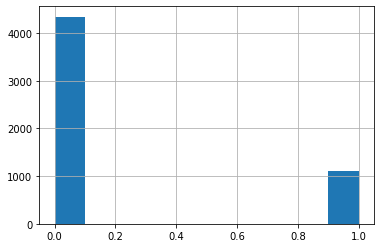

In [34]:
learn_target.hist();
cls_1 = (learn_target==1).sum()
cls_0 = (learn_target==0).sum()
print(
    f'число отрицательныx объектов: {cls_0}',
    f'число положительныx объектов: {cls_1}',
    f'отношение:{cls_1 / cls_0:.3%}',      
     sep='\n')

баланс классов явно пререкошен в стоорону отрицательных значений

отношение меджу положительными и отрицательными обьектами, для остальных выборок, будет аналогичным, тк на этапе их разделения использовался параметр `stratify`.

### DecisionTreeClassifier

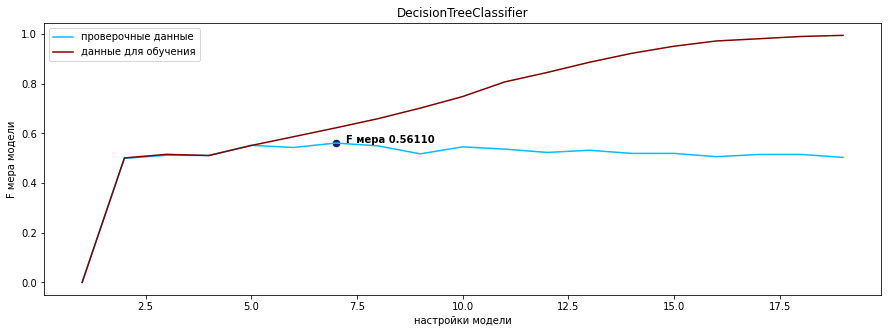

F мера лучшей модели: 0.5611015490533563
AUC-ROC лучшей модели: 0.8155248991079805

**********

CPU times: user 770 ms, sys: 8.37 ms, total: 779 ms
Wall time: 788 ms


In [35]:
%%time
data_unbalanced = pd.concat(
    [
    data_unbalanced,
    pd.DataFrame(decision_tree_classifier()[1]),
    ],
    axis=0,ignore_index=False)

### RandomForestClassifier

расчитаем лучшее число деревьев

Подбор глубины
F мера лучшей модели: 0.5809682804674458
AUC-ROC лучшей модели: 0.8384331581063573

**********

лучшая глубина: 12
Количество деревьев: 10

**********



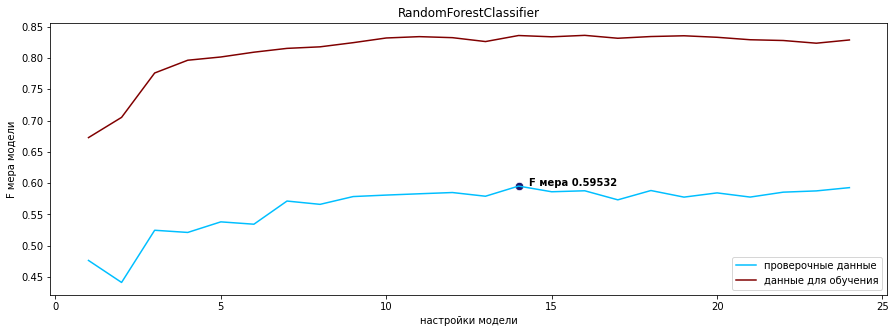

F мера лучшей модели: 0.5953177257525083
AUC-ROC лучшей модели: 0.8454295170585695

**********

CPU times: user 4.78 s, sys: 18 ms, total: 4.8 s
Wall time: 4.81 s


In [36]:
%%time
data_unbalanced = pd.concat(
    [
        data_unbalanced,
        pd.DataFrame(
            random_forest_classifier(
                settings=set_params_n_estimators(
                    mod_forest().get_params(),
                    start=1,
                    stop=25,
                    step=1),
            )[1])],
    axis=0, ignore_index=True)

### LogisticRegression

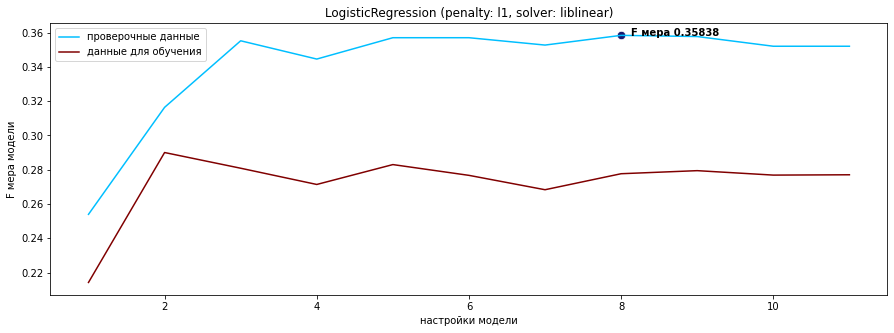

F мера лучшей модели: 0.3583815028901734
AUC-ROC лучшей модели: 0.7734155113103305

**********



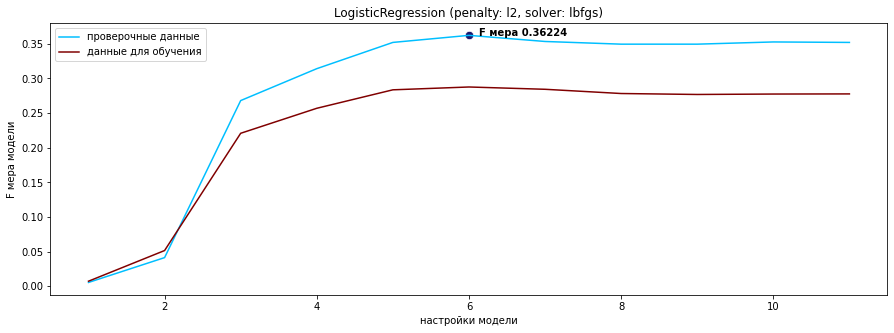

F мера лучшей модели: 0.36223506743737954
AUC-ROC лучшей модели: 0.7703719974386085

**********



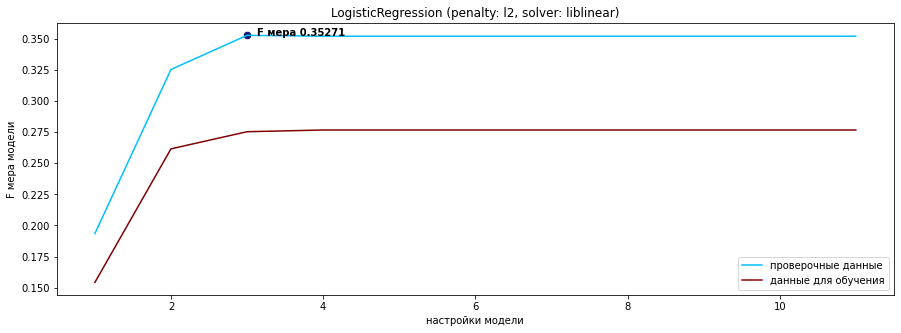

F мера лучшей модели: 0.35271317829457366
AUC-ROC лучшей модели: 0.7743220503045375

**********

CPU times: user 3.23 s, sys: 4.11 s, total: 7.34 s
Wall time: 7.36 s


In [37]:
%%time
for item in logistic_regression()[1]:
    data_unbalanced = pd.concat(
        [
            data_unbalanced,
            pd.DataFrame(item)],
        axis=0,
        ignore_index=True)


In [38]:
data_unbalanced = data_unbalanced.drop_duplicates().sort_values(
    by='f1_score_1',
    ascending=False,
)
data_unbalanced.drop(['model'], axis=1)

,name,model_score,f1_score_1,f1_score_0,recall_score,auc-roc
1,RandomForestClassifier,0.866960,0.595318,0.920395,0.479784,0.845430
0,DecisionTreeClassifier,0.859813,0.561102,0.916585,0.439353,0.815525
3,LogisticRegression,0.818032,0.362235,0.893876,0.253369,0.770372
2,LogisticRegression,0.816932,0.358382,0.893235,0.250674,0.773416
4,LogisticRegression,0.816383,0.352713,0.893017,0.245283,0.774322


### Краткий вывод


На данном этапе была проведена следующая работа:
* были рассмотрены и обучены модели:
  * DecisionTreeClassifier (дерево)
  * RandomForestClassifier (случайный лес)
  * LogisticRegression (логистическая регрессия)
* расчиитаны показатели `f1_score по бинарному признаку и классу 1`, `score` и `recall_score` на обучающих и проверочнных данных.
* на основании данных полученных при обучении моделей построены графики и собрана сводная таблица с лучшими результатами

Лучшие результаты показала модель <b>RandomForestClassifier</b> c score = 0.867, f1_score = 0.595 и AUC-ROC = 0.845 при параметрах max_depth = 12, n_estimators = 14

попробуем улучшить показатели на следующем этапе, используя методы борьбы с дисбалансом классов

## Борьба с дисбалансом

посмотрим на баланс классов на примере learn_target.

In [39]:
learn_data, learn_target = tmp_learn_data, tmp_learn_target

In [40]:
#learn_target.hist();
cls_1 = (learn_target==1).sum()
cls_0 = (learn_target==0).sum()
print(
    f'число отрицательныx объектов: {cls_0}',
    f'число положительныx объектов: {cls_1}',
    f'отношение:{cls_1 / cls_0:.3%}',      
     sep='\n')

число отрицательныx объектов: 4342
число положительныx объектов: 1112
отношение:25.610%


### Уменьшение выборки

In [41]:
data_balanced_dwn = pd.DataFrame()

таблица для сохранения результатов

создадим функцию для уменьшения обучающей выборки

In [42]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
        
    return features_downsampled, target_downsampled

In [43]:
learn_data, learn_target = downsample(tmp_learn_data, tmp_learn_target, 0.256)

In [44]:
#learn_target.hist();
cls_1 = (learn_target==1).sum()
cls_0 = (learn_target==0).sum()
print(
    'результат применения функции:',
    f'число отрицательныx объектов: {cls_0}',
    f'число положительныx объектов: {cls_1}',
    f'отношение:{cls_1 / cls_0:.3%}',      
     sep='\n')

результат применения функции:
число отрицательныx объектов: 1112
число положительныx объектов: 1112
отношение:100.000%


применим увеличенные данные к лучшей модели, полученной на предидущих этапах.

параметры возьмем из сводной таблицы

In [45]:
exec(data_unbalanced.model.iloc[0])
best_model.fit(learn_data, learn_target)
print('model', best_model)
print('\n', 'старые значения:')
print(data_unbalanced.iloc[0][['f1_score_1', 'auc-roc']])
print('\n', '*' * 10, '\n')
print('новые значения:')
#print(f'score: {best_model.score(valid_data, valid_target,)}')
f1_sr =f1_score(valid_target,
                best_model.predict(valid_data),
                average="binary",
                pos_label=1)
print(f'F1_score: {f1_sr}')
print('roc_auc', roc_auc_score(valid_target, best_model.predict_proba(valid_data)[:,1]))
print('\n', '*' * 50, '\n')

model RandomForestClassifier(max_depth=12, n_estimators=14, random_state=12345)

 старые значения:
f1_score_1    0.595318
auc-roc        0.84543
Name: 1, dtype: object

 ********** 

новые значения:
F1_score: 0.556149732620321
roc_auc 0.8315633795475867

 ************************************************** 



модель показывает некоторое снижение F1 score и AUC-ROC.
попробуем подабрать параметры заново для всех моделей и сохраним их в сводную таблицу

#### DecisionTreeClassifier

In [46]:
data_balanced_dwn = pd.concat(
    [
    data_balanced_dwn,
    pd.DataFrame(decision_tree_classifier(plt=False)[1]),
    ],
    axis=0,ignore_index=False)

F мера лучшей модели: 0.5582761998041136
AUC-ROC лучшей модели: 0.8335216526931839

**********



#### RandomForestClassifier

In [47]:
%%time
data_balanced_dwn = pd.concat(
    [
        data_balanced_dwn,
        pd.DataFrame(
            random_forest_classifier(
                settings=set_params_n_estimators(
                    mod_forest().get_params(),
                    start=1,
                    stop=25,
                    step=1),
                plt=False,
            )[1])],
    axis=0, ignore_index=True)

Подбор глубины
F мера лучшей модели: 0.5802337938363443
AUC-ROC лучшей модели: 0.8428709177823115

**********

лучшая глубина: 7
Количество деревьев: 10

**********

F мера лучшей модели: 0.5954198473282442
AUC-ROC лучшей модели: 0.848809027415824

**********

CPU times: user 2.5 s, sys: 0 ns, total: 2.5 s
Wall time: 2.51 s


#### LogisticRegression

In [48]:
%%time
for item in logistic_regression(plt=False)[1]:
    data_balanced_dwn = pd.concat(
        [
            data_balanced_dwn,
            pd.DataFrame(item)],
        axis=0,
        ignore_index=True)

F мера лучшей модели: 0.5108910891089109
AUC-ROC лучшей модели: 0.7810941013536656

**********

F мера лучшей модели: 0.5117707267144319
AUC-ROC лучшей модели: 0.7741824395764769

**********

F мера лучшей модели: 0.5067961165048543
AUC-ROC лучшей модели: 0.7789962174800077

**********

CPU times: user 1.83 s, sys: 3.1 s, total: 4.93 s
Wall time: 4.89 s


сводная таблица уменьшения выборки

In [49]:
data_balanced_dwn = data_balanced_dwn.drop_duplicates().sort_values(by='f1_score_1', ascending=False)
data_balanced_dwn.drop(['model'], axis=1)

,name,model_score,f1_score_1,f1_score_0,recall_score,auc-roc
1,RandomForestClassifier,0.796042,0.595420,0.863653,0.735849,0.848809
0,DecisionTreeClassifier,0.752062,0.558276,0.827665,0.768194,0.833522
3,LogisticRegression,0.737768,0.511771,0.820744,0.673854,0.774182
2,LogisticRegression,0.728422,0.510891,0.812024,0.695418,0.781094
4,LogisticRegression,0.720726,0.506796,0.805215,0.703504,0.778996


сводная таблица несбалансированная

In [50]:
data_unbalanced.drop(['model'], axis=1)

,name,model_score,f1_score_1,f1_score_0,recall_score,auc-roc
1,RandomForestClassifier,0.866960,0.595318,0.920395,0.479784,0.845430
0,DecisionTreeClassifier,0.859813,0.561102,0.916585,0.439353,0.815525
3,LogisticRegression,0.818032,0.362235,0.893876,0.253369,0.770372
2,LogisticRegression,0.816932,0.358382,0.893235,0.250674,0.773416
4,LogisticRegression,0.816383,0.352713,0.893017,0.245283,0.774322


как видно из сводной таблицы, после уменьшения выборки и доведения отношения между параметрами до 100%, показатели F1 score и recall score правтически не изменились. с дисбалансом в 25% модели показывали рост метрик

### Увеличение выборки

In [51]:
data_balanced_up = pd.DataFrame()

таблица для сохранения результатов

In [52]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [53]:
learn_data, learn_target = upsample(tmp_learn_data, tmp_learn_target, cls_0 // cls_1)

In [54]:
#learn_target.hist();
cls_1 = (learn_target==1).sum()
cls_0 = (learn_target==0).sum()
print(
    'результат применения функции:',
    f'число отрицательныx объектов: {cls_0}',
    f'число положительныx объектов: {cls_1}',
    f'отношение:{cls_1 / cls_0:.3%}',      
     sep='\n')

результат применения функции:
число отрицательныx объектов: 4342
число положительныx объектов: 1112
отношение:25.610%


#### DecisionTreeClassifier

In [55]:
%%time
data_balanced_up = pd.concat(
    [
    data_balanced_up,
    pd.DataFrame(decision_tree_classifier(plt=False)[1]),
    ],
    axis=0,ignore_index=False)

F мера лучшей модели: 0.5611015490533563
AUC-ROC лучшей модели: 0.8155248991079805

**********

CPU times: user 525 ms, sys: 0 ns, total: 525 ms
Wall time: 533 ms


#### RandomForestClassifier

In [56]:
%%time
data_balanced_up = pd.concat(
    [
        data_balanced_up,
        pd.DataFrame(
            random_forest_classifier(
                settings=set_params_n_estimators(
                    mod_forest().get_params(),
                    start=1,
                    stop=25,
                    step=1),
                plt=False,
            )[1])],
    axis=0, ignore_index=True)

Подбор глубины
F мера лучшей модели: 0.5823627287853579
AUC-ROC лучшей модели: 0.8291816205268723

**********

лучшая глубина: 12
Количество деревьев: 10

**********

F мера лучшей модели: 0.5973154362416108
AUC-ROC лучшей модели: 0.840502189096216

**********

CPU times: user 4.51 s, sys: 0 ns, total: 4.51 s
Wall time: 4.53 s


#### LogisticRegression

In [57]:
%%time
for item in logistic_regression(plt=False)[1]:
    data_balanced_up = pd.concat(
        [
            data_balanced_up,
            pd.DataFrame(item)],
        axis=0,
        ignore_index=True)

F мера лучшей модели: 0.3583815028901734
AUC-ROC лучшей модели: 0.7734155113103305

**********

F мера лучшей модели: 0.36223506743737954
AUC-ROC лучшей модели: 0.7703719974386085

**********

F мера лучшей модели: 0.35271317829457366
AUC-ROC лучшей модели: 0.7743220503045375

**********

CPU times: user 3.15 s, sys: 6.45 s, total: 9.6 s
Wall time: 9.53 s


In [58]:
data_balanced_up = data_balanced_up.drop_duplicates().sort_values(by='f1_score_1', ascending=False)
data_balanced_up.drop(['model'], axis=1)

,name,model_score,f1_score_1,f1_score_0,recall_score,auc-roc
1,RandomForestClassifier,0.868059,0.597315,0.921105,0.479784,0.840502
0,DecisionTreeClassifier,0.859813,0.561102,0.916585,0.439353,0.815525
3,LogisticRegression,0.818032,0.362235,0.893876,0.253369,0.770372
2,LogisticRegression,0.816932,0.358382,0.893235,0.250674,0.773416
4,LogisticRegression,0.816383,0.352713,0.893017,0.245283,0.774322


In [59]:
data_unbalanced.drop(['model'], axis=1)

,name,model_score,f1_score_1,f1_score_0,recall_score,auc-roc
1,RandomForestClassifier,0.866960,0.595318,0.920395,0.479784,0.845430
0,DecisionTreeClassifier,0.859813,0.561102,0.916585,0.439353,0.815525
3,LogisticRegression,0.818032,0.362235,0.893876,0.253369,0.770372
2,LogisticRegression,0.816932,0.358382,0.893235,0.250674,0.773416
4,LogisticRegression,0.816383,0.352713,0.893017,0.245283,0.774322


как видно из сводной таблицы, после изменения параметров и обучения модели показатели F1 score и recall score увеличились. F1 score вырос почти на 4%, а recall_score на 21,9%, auc-roc практически не изменился

### Краткий вывод

в при рассмотрении способов уменьшения влияния дисбаланса классов на обучение модели было рассмотрено 2 способа:
* уменьшение выборки
* увеличение выборки

способ увеличение выборки показал увиличение F1 score и recall_score на 4% и 22% соответственно, что говорит о увеличении качества предсказания, которое дает обучение на выборках при уменьшении дисбаланса в классах
для тестирования модели будем использовать выборку с уменьшиным дисбалансом, по методу увеличение выборки.

## Тестирование модели

### Тестирование модели

проведем тестирование трех лучших моделей на тестовой выборке
и для одной из них построим ROC-кривую

In [60]:
for item in [data_unbalanced, data_balanced_dwn, data_balanced_up]:
    print(item.iloc[0]['model'],)

best_model=RandomForestClassifier(max_depth=12, n_estimators=14, random_state=12345)
best_model=RandomForestClassifier(max_depth=7, n_estimators=17, random_state=12345)
best_model=RandomForestClassifier(max_depth=12, n_estimators=16, random_state=12345)


обучим 3 лучшие модели, по рейтингу f1_score, параметры для которых возьмем из сводной таблицы. получим предсказания этих моделей и посчитаем f1_score и recall_score

In [61]:
for item in [data_unbalanced, data_balanced_dwn, data_balanced_up]:
    exec(item.iloc[0]['model'])
    best_model.fit(learn_data, learn_target)
    predict = best_model.predict(test_data)
    print(best_model)
    print('recall_score: ', round(recall_score(test_target,predict), 6))
    print('f1_score: ', f'{f1_score(test_target, predict, pos_label=1): .6f}')
    print('roc_auc', roc_auc_score(test_target, best_model.predict_proba(test_data)[:,1]))
    print('\n', '*' * 50, '\n')

RandomForestClassifier(max_depth=12, n_estimators=14, random_state=12345)
recall_score:  0.474394
f1_score:   0.579901
roc_auc 0.8559255416448569

 ************************************************** 

RandomForestClassifier(max_depth=7, n_estimators=17, random_state=12345)
recall_score:  0.433962
f1_score:   0.563923
roc_auc 0.8707931830332114

 ************************************************** 

RandomForestClassifier(max_depth=12, n_estimators=16, random_state=12345)
recall_score:  0.477089
f1_score:   0.583196
roc_auc 0.8579829631713165

 ************************************************** 



все 3 модели показали хороший результат. F1_score всех моделей выше 0.60, roc_auc > 0,85


### ROC - кривая

построим ROC-кривая для второй модели из сводной таблицы

In [62]:
exec(data_balanced_dwn.model.iloc[0])
best_model.fit(learn_data, learn_target)
probabilities = best_model.predict_proba(test_data)

In [63]:
fpr, tpr, thresholds = roc_curve(test_target, probabilities[:,1]) 

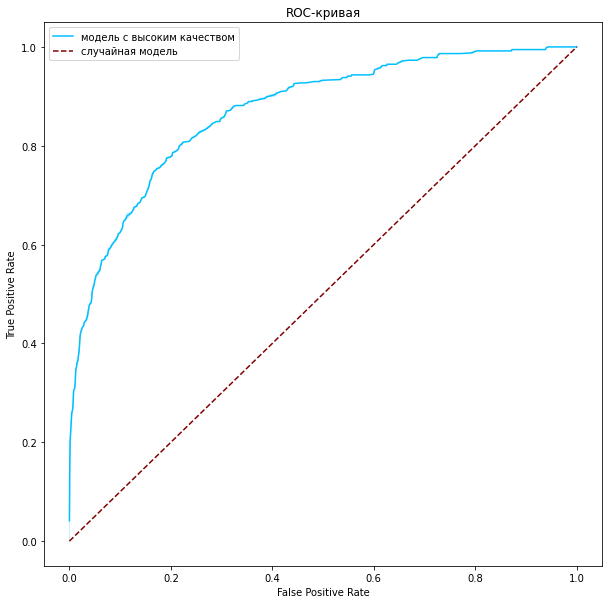

In [64]:
fig, ax = plt.subplots(ncols=1, figsize=(10,10))
sns.lineplot(ax=ax,
             y=tpr,
             x=fpr,
             color='#00BFFF',
             legend=True,
             label='модель с высоким качеством',
            )
sns.lineplot(ax=ax,
             y=[0, 1],
             x=[0, 1],
             color='#800000',
             legend=True,
             label='случайная модель',
             linestyle = '--'
            )
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-кривая')
plt.show()

Чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»). Это новая метрика качества, которая изменяется от 0 до 1. AUC-ROC случайной модели равна 0.5.

In [65]:
print('AUC-ROC: ',roc_auc_score(test_target, probabilities[:,1]))

AUC-ROC:  0.8707931830332114


Для модели, которая всегда отвечает случайно, ROC-кривая выглядит как прямая, идущая из левого нижнего угла в верхний правый. Чем график выше, тем больше значение TPR и лучше качество модели.

ТК наша кривая располагается далеко от прямой, то можно говорить о хорошем качестве модели

### Краткий вывод

при реботе над разделом были обучены 3 модели, на учебных данных полученных ранее, методом уменьшения выборки, при борьбе с дисбалансом объектов. Все 3 модели показали хороший результат. F1_score всех моделей выше 0.6, recall_score выше 0.65, AUC-ROC > 0,85
также, для оценки одной из моделей, была построена ROC-кривая и посчитана AUC-ROC которая составила 0.87

## Вывод

В ходе работы над первой частью проекта были выполнены работы:

    Открыты и изучены данные
    Прооведена минимальная предобработка в ходе которой удалены пустые значения слабо влияющие на целевой признак
    Разделины данные на выборки в соотношении 3:1:1
    Обработаны от категориальные признаки

В ходе проведения исследования задачи была проведена следующая работа:

*    были рассмотрены и обучены модели:
 *      DecisionTreeClassifier (дерево)
 *      RandomForestClassifier (случайный лес)
 *      LogisticRegression (логистическая регрессия)
*    расчиитаны показатели f1_score по бинарному признаку и классу 1, score и recall_score на обучающих и проверочнных данных.
*    на основании данных полученных при обучении моделей построены графики и собрана сводная таблица с лучшими результатами

    Лучшие результаты показала модель RandomForestClassifier c score = 0.867 и f1_score = 0.595, AUC-ROC = 0.845  при параметрах max_depth=7, n_estimators=17,
    
recall_score:  0.67655
f1_score:   0.628285
roc_auc 0.8731877646287421

При работе над уменьшением дисбаланса было использовано 2 способа:
*    уменьшение выборки
*    увеличение выборки
способ увеличение выборки показал увиличение F1 score и recall_score на 4% и 22% соответственно, что говорит о увеличении качества предсказания, которое дает обучение на выборках при уменьшении дисбаланса в классах для тестирования модели будем использовать выборку с уменьшиным дисбалансом, по методу увеличение выборки.


В ходе работы над проектом было проведено тестирование 3-х лучших моделей, предварительно обученных на данных, полученных методом upsampling при борьбе с дисбалансом выборки. Все 3 тестируемые модели показали хороший результат. F1_score всех моделей выше 0.6, АUC-ROC выше 0,85 также, для оценки одной из моделей, была построена ROC-кривая и посчитана AUC-ROC которая составила 0.87
лучшая модель и параметры: RandomForestClassifier(max_depth=7, n_estimators=17, random_state=12345)